In [1]:
#Importando bibliotecas
import pandas as pd
import requests
import os
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from datetime import datetime


In [2]:
# Criar pasta para salvar os arquivos
os.makedirs(r"\dados", exist_ok=True)

# Definir o intervalo de anos
ano_atual = datetime.now().year
anos = range(2008, ano_atual)  # Vai de 2008 até o ultimo ano processado

# URL base da API
url_base = "https://adm.senado.gov.br/adm-dadosabertos/api/v1/senadores/despesas_ceaps/{}/csv"

# Loop para baixar os arquivos
for ano in anos:
    url = url_base.format(ano)
    response = requests.get(url, headers={"accept": "text/csv"})
    
    if response.status_code == 200:
        caminho_arquivo = f"dados/despesas_{ano}.csv"
        with open(caminho_arquivo, "wb") as f:
            f.write(response.content)
        print(f"✔ Dados de {ano} baixados com sucesso!")
    else:
        print(f"❌ Falha ao baixar dados de {ano}. Código {response.status_code}")

print("Download concluído!")


✔ Dados de 2008 baixados com sucesso!
✔ Dados de 2009 baixados com sucesso!
✔ Dados de 2010 baixados com sucesso!
✔ Dados de 2011 baixados com sucesso!
✔ Dados de 2012 baixados com sucesso!
✔ Dados de 2013 baixados com sucesso!
✔ Dados de 2014 baixados com sucesso!
✔ Dados de 2015 baixados com sucesso!
✔ Dados de 2016 baixados com sucesso!
✔ Dados de 2017 baixados com sucesso!
✔ Dados de 2018 baixados com sucesso!
✔ Dados de 2019 baixados com sucesso!
✔ Dados de 2020 baixados com sucesso!
✔ Dados de 2021 baixados com sucesso!
✔ Dados de 2022 baixados com sucesso!
✔ Dados de 2023 baixados com sucesso!
✔ Dados de 2024 baixados com sucesso!
Download concluído!


Carregamento, limpeza e tratamento de dados

In [3]:
# Caminho da pasta
caminho_pasta = "dados/"

# Listar todos os arquivos na pasta e filtrar apenas os que terminam com .csv
lista_arquivos = [os.path.join(caminho_pasta, f) for f in os.listdir(caminho_pasta) if f.endswith(".csv")]

# Lista para armazenar os DataFrames lidos
dataframes = []

# Loop para ler cada arquivo CSV
for arquivo in lista_arquivos:
    df = pd.read_csv(arquivo, encoding='utf-8', sep=';')
    dataframes.append(df)

# Concatenando os DataFrames da lista em um único DataFrame
ceaps_total = pd.concat(dataframes, ignore_index=True)
ceaps_total.head()

,ID,TIPO_DOCUMENTO,ANO,MÊS,NOME_SENADOR,TIPO_DESPESA,CPF_CNPJ_FORNECEDOR,NOME_FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
0,2008090145602,NaN,2008,9,ALVARO DIAS,Aquisição de material de consumo para uso no e...,NaN,NaN,NaN,NaN,NaN,"1891,40"
1,2008090145604,NaN,2008,9,ALVARO DIAS,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,"5087,97"
2,2008090145603,NaN,2008,9,ALVARO DIAS,"Locomoção, hospedagem, alimentação, combustíve...",NaN,NaN,NaN,NaN,NaN,"779,25"
3,2008100145601,NaN,2008,10,ALVARO DIAS,"Aluguel de imóveis para escritório político, c...",NaN,NaN,NaN,NaN,NaN,"3320,36"
4,2008100145602,NaN,2008,10,ALVARO DIAS,Aquisição de material de consumo para uso no e...,NaN,NaN,NaN,NaN,NaN,"101,39"


In [4]:
ceaps_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358147 entries, 0 to 358146
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   358147 non-null  int64 
 1   TIPO_DOCUMENTO       355003 non-null  object
 2   ANO                  358147 non-null  int64 
 3   MÊS                  358147 non-null  int64 
 4   NOME_SENADOR         358147 non-null  object
 5   TIPO_DESPESA         357942 non-null  object
 6   CPF_CNPJ_FORNECEDOR  355003 non-null  object
 7   NOME_FORNECEDOR      355003 non-null  object
 8   DOCUMENTO            331624 non-null  object
 9   DATA                 355003 non-null  object
 10  DETALHAMENTO         197628 non-null  object
 11  VALOR_REEMBOLSADO    358147 non-null  object
dtypes: int64(3), object(9)
memory usage: 32.8+ MB


In [5]:
#Removendo colunas
ceaps_total.drop(['DOCUMENTO', 'DATA', 'DETALHAMENTO'], axis=1, inplace=True)
ceaps_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358147 entries, 0 to 358146
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   358147 non-null  int64 
 1   TIPO_DOCUMENTO       355003 non-null  object
 2   ANO                  358147 non-null  int64 
 3   MÊS                  358147 non-null  int64 
 4   NOME_SENADOR         358147 non-null  object
 5   TIPO_DESPESA         357942 non-null  object
 6   CPF_CNPJ_FORNECEDOR  355003 non-null  object
 7   NOME_FORNECEDOR      355003 non-null  object
 8   VALOR_REEMBOLSADO    358147 non-null  object
dtypes: int64(3), object(6)
memory usage: 24.6+ MB


In [6]:
#Tratando valores nulo
ceaps_total.TIPO_DOCUMENTO = ceaps_total.TIPO_DOCUMENTO.fillna('NAO INFORMADO')
ceaps_total.CPF_CNPJ_FORNECEDOR = ceaps_total.CPF_CNPJ_FORNECEDOR.fillna('NAO INFORMADO')
ceaps_total.NOME_FORNECEDOR = ceaps_total.NOME_FORNECEDOR.fillna('NAO INFORMADO')
ceaps_total.TIPO_DESPESA = ceaps_total.TIPO_DESPESA.fillna('NAO INFORMADO')

In [7]:
#Verificando coluna 'TIPO_DESPESA'
ceaps_total['TIPO_DESPESA'].value_counts()

TIPO_DESPESA
Locomoção, hospedagem, alimentação, combustíveis e lubrificantes                                                                                                                                   149886
Passagens aéreas, aquáticas e terrestres nacionais                                                                                                                                                  74807
Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.                                                                                                            69986
Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.      28458
Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar                                             

In [8]:
# Dicionário de mapeamento
mapa_despesas = {
    'Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.': 'Aluguel',
    'Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos. ': 'Despesas gerais',
    'Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar': 'Contratações',
    'Locomoção, hospedagem, alimentação, combustíveis e lubrificantes': 'Locomoção, hospedagem e alimentação',
    'Passagens aéreas, aquáticas e terrestres nacionais': 'Passagens',
    'Divulgação da atividade parlamentar': 'Divulgação',
    'Serviços de Segurança Privada': 'Segurança'
}

In [9]:
# Substituir os valores na própria coluna 'TIPO_DESPESA' usando o dicionário de mapeamento
ceaps_total['TIPO_DESPESA'] = ceaps_total['TIPO_DESPESA'].map(mapa_despesas)

In [10]:
#Tratando coluna VALOR_REEMBOLSADO
ceaps_total['VALOR_REEMBOLSADO'] = ceaps_total['VALOR_REEMBOLSADO'].str.replace(',', '.')

In [11]:
# Convertendo a coluna 'VALOR_REEMBOLSADO' para numérico
ceaps_total['VALOR_REEMBOLSADO'] = pd.to_numeric(ceaps_total['VALOR_REEMBOLSADO'], errors='coerce')

In [12]:
#Verificando coluna VALOR_REEMBOLSADO
ceaps_total['VALOR_REEMBOLSADO'].describe()

count    358147.000000
mean       1074.943583
std        2739.700653
min       -3314.170000
25%         101.725000
50%         300.000000
75%        1041.590000
max      270000.000000
Name: VALOR_REEMBOLSADO, dtype: float64

In [13]:
#Verificando valores negativos
ceaps_total[ceaps_total['VALOR_REEMBOLSADO']<0]

,ID,TIPO_DOCUMENTO,ANO,MÊS,NOME_SENADOR,TIPO_DESPESA,CPF_CNPJ_FORNECEDOR,NOME_FORNECEDOR,VALOR_REEMBOLSADO
151296,2001228,Recibo,2015,2,GLADSON CAMELI,Aluguel,63.600.449/0001-00,Arras Adm. de Bens Imóveis Limpeza e Conservaç...,-1500.00
203454,2068568,Nota Fiscal Eletrônica,2017,5,DÁRIO BERGER,Contratações,73.228.876/0001-63,TV CLIPAGEM LTDA. EPP.,-243.40
318147,2219278,Fatura,2023,12,LAÉRCIO OLIVEIRA,Contratações,06.064.175/0001-49,Aires Turismo,-1823.47
318157,2216705,Fatura,2023,12,ELIZIANE GAMA,Contratações,06.064.175/0001-49,Aires Turismo,-428.73
318161,2217251,Fatura,2023,12,ELIZIANE GAMA,Passagens,06.064.175/0001-49,Aires Turismo,-297.23
...,...,...,...,...,...,...,...,...,...
352397,2218575,Fatura,2024,1,JAIME BAGATTOLI,Passagens,06.064.175/0001-49,AIRES TURISMO,-405.25
352398,2218578,Fatura,2024,1,JAIME BAGATTOLI,Passagens,06.064.175/0001-49,AIRES TURISMO,-411.29
352399,2218574,Fatura,2024,1,JAIME BAGATTOLI,Passagens,06.064.175/0001-49,AIRES TURISMO,-488.89
354507,2222306,Nota Fiscal Eletrônica,2024,3,MARCOS DO VAL,Aluguel,66.970.229/0104-72,Claro NXT Telecomunicações S.A,-14.50


In [14]:
#Convertendo os valores negativos para valores absolutos
ceaps_total['VALOR_REEMBOLSADO'] = abs(ceaps_total['VALOR_REEMBOLSADO'])

In [15]:
top_fornecedores = (
    ceaps_total.groupby('CPF_CNPJ_FORNECEDOR', as_index=False)['VALOR_REEMBOLSADO']
    .sum()
    .nlargest(10, 'VALOR_REEMBOLSADO')
)
top_fornecedores

,CPF_CNPJ_FORNECEDOR,VALOR_REEMBOLSADO
18277,16.978.175/0001-08,15441404.02
2384,02.012.862/0001-60,14685445.54
29432,NAO INFORMADO,14366979.92
10179,07.575.651/0001-59,9749283.88
23277,33.937.681/0001-78,6043990.48
21293,26.480.780/0001-08,3568323.90
7078,05.120.923/0001-09,3151669.19
3217,02.575.829/0001-48,3069466.80
8560,06.064.175/0001-49,2630232.70
12679,09.296.295/0001-60,2358416.04


In [16]:
ceaps_total['TIPO_DOCUMENTO'].value_counts()

TIPO_DOCUMENTO
Nota Fiscal Eletrônica                     75437
Nota Fiscal                                66038
Cupom Fiscal                               58902
Passagem / Bilhete / Código Localizador    44685
Fatura                                     40357
Recibo                                     30398
Bilhete / Código localizador               26764
Boleto                                      9182
Boleto Bancário                             3240
NAO INFORMADO                               3144
Name: count, dtype: int64

In [17]:
# Dicionário de padronização
padronizacao_documento = {
    r'NOTA FISCAL ELETRÔNICA': 'NOTA FISCAL',
    r'NOTA FISCAL': 'NOTA FISCAL',
    r'BOLETO BANCÁRIO|BOLETO': 'BOLETO',
    r'BILHETE / CÓDIGO LOCALIZADOR|PASSAGEM / BILHETE / CÓDIGO LOCALIZADOR': 'PASSAGEM AÉREA',
    r'FATURA': 'FATURA',
    r'RECIBO': 'RECIBO',
    r'CUPOM FISCAL': 'CUPOM FISCAL'
}

# Função para aplicar a padronização
def padronizar_tipo_documento(tipo):
    tipo = tipo.upper().strip()  # Converter para maiúsculas e remover espaços extras
    for padrao, substituto in padronizacao_documento.items():
        if re.search(padrao, tipo):  
            return substituto  
    return tipo  # Se não bater com nenhum padrão, mantém o original

# Aplicando ao dataframe
ceaps_total['TIPO_DOCUMENTO'] = ceaps_total['TIPO_DOCUMENTO'].apply(padronizar_tipo_documento)


In [24]:
ceaps_total.sample(5)

,ID,TIPO_DOCUMENTO,ANO,MÊS,NOME_SENADOR,TIPO_DESPESA,CPF_CNPJ_FORNECEDOR,NOME_FORNECEDOR,VALOR_REEMBOLSADO
349442,2244593,PASSAGEM AÉREA,2024,12,RODRIGO CUNHA,Passagens,26.480.780/0001-08,LM EMPRESA DE TURISMO LTDA,1724.24
31899,302447,FATURA,2010,10,MARCONI PERILLO,Aluguel,76.535.764/0328-51,BRASIL TELECOM,85.21
310174,2192399,BOLETO,2022,11,GIORDANO,Despesas gerais,02.474.111/0001-65,A CASA DO MICRO,243.76
73122,647021,NOTA FISCAL,2012,10,IVO CASSOL,"Locomoção, hospedagem e alimentação",13.417.224/0001-45,POSTO TAQUARA,125.00
152323,2019333,CUPOM FISCAL,2015,9,FÁTIMA BEZERRA,"Locomoção, hospedagem e alimentação",04.534.989/0001-74,POSTO SÃO RAFAEL,140.01


Análise Exploratória:

Valor total de reembolsos por ano

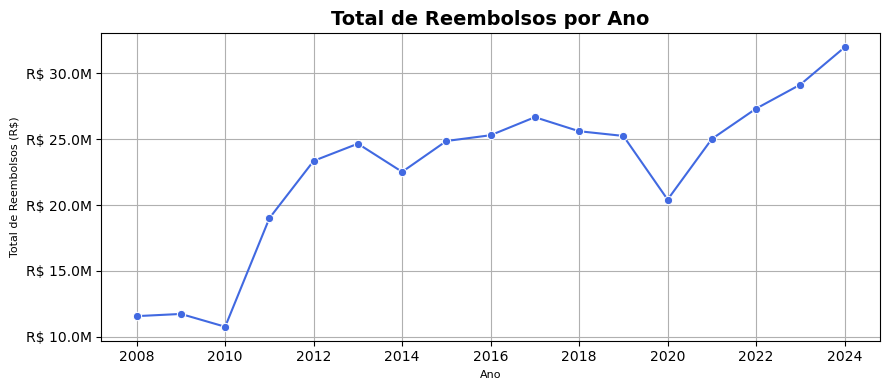

In [19]:
# Agrupando por ano e somando os valores reembolsados
reembolsos_por_ano = ceaps_total.groupby('ANO')['VALOR_REEMBOLSADO'].sum().reset_index()

# Configurações do gráfico
plt.figure(figsize=(9, 4))
sns.lineplot(data=reembolsos_por_ano, x='ANO', y='VALOR_REEMBOLSADO', marker='o', color='royalblue')

plt.title('Total de Reembolsos por Ano', fontsize=14, fontweight='bold')
plt.xlabel('Ano', fontsize=8)
plt.ylabel('Total de Reembolsos (R$)', fontsize=8)
# Formatando o eixo Y para milhões
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'R$ {x/1e6:.1f}M'))
plt.grid(True)
plt.tight_layout()
plt.show()


Valor de reembolso por mês

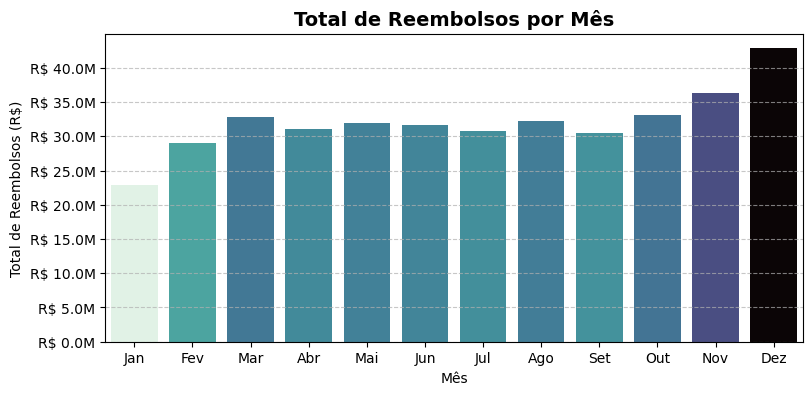

In [20]:
# Agrupar os dados por mês e somar os valores reembolsados
reembolsos_por_mes = ceaps_total.groupby('MÊS')['VALOR_REEMBOLSADO'].sum().reset_index()

# Ordenar os meses corretamente (caso não estejam em ordem)
reembolsos_por_mes = reembolsos_por_mes.sort_values(by='MÊS')

# Criar um gráfico de barras com cores invertidas
plt.figure(figsize=(9, 4))
sns.barplot(data=reembolsos_por_mes, x='MÊS', y='VALOR_REEMBOLSADO', hue='VALOR_REEMBOLSADO', palette='mako_r', legend=False)  # 'mako_r' inverte a paleta

# Ajustar os rótulos e título
plt.title('Total de Reembolsos por Mês', fontsize=14, fontweight='bold')
plt.xlabel('Mês', fontsize=10)
plt.ylabel('Total de Reembolsos (R$)', fontsize=10)
plt.xticks(range(0, 12), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

# Formatando o eixo Y para mostrar valores em milhões
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'R$ {x/1e6:.1f}M'))

# Adicionar linhas de grade no eixo Y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.show()


10 Senadores que mais receberam reembolso

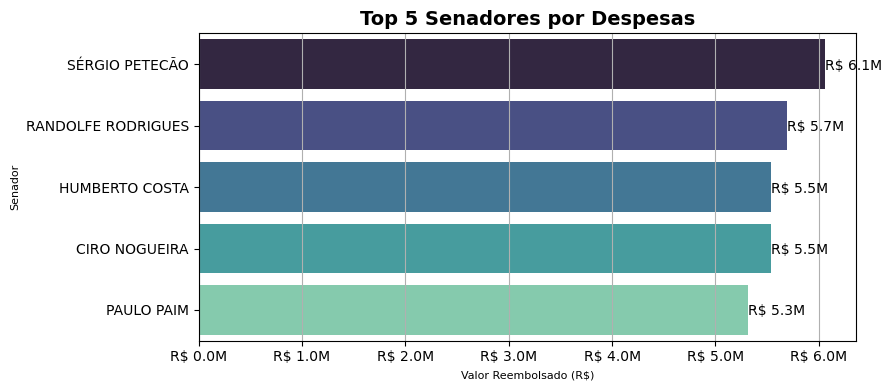

In [21]:
# Agrupando por senador e somando as despesas
despesas_por_senador = ceaps_total.groupby('NOME_SENADOR')['VALOR_REEMBOLSADO'].sum().nlargest(5).reset_index()

# Criando o gráfico de barras
plt.figure(figsize=(9, 4))
ax = sns.barplot(data=despesas_por_senador, x='VALOR_REEMBOLSADO', y='NOME_SENADOR', hue='NOME_SENADOR', palette='mako')

# Adicionando rótulos com os valores corretos e ajustando a posição
for p in ax.patches:
    ax.annotate(f'R$ {p.get_width()/1e6:.1f}M', 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center_baseline', fontsize=10, color='black')
    
# Formatando o eixo X para milhões
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'R$ {x/1e6:.1f}M'))

# Configurações adicionais do gráfico
plt.title('Top 5 Senadores por Despesas', fontsize=14, fontweight='bold')
plt.xlabel('Valor Reembolsado (R$)', fontsize=8)
plt.ylabel('Senador', fontsize=8)
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

Valor de reembolsos por tipo de despesa

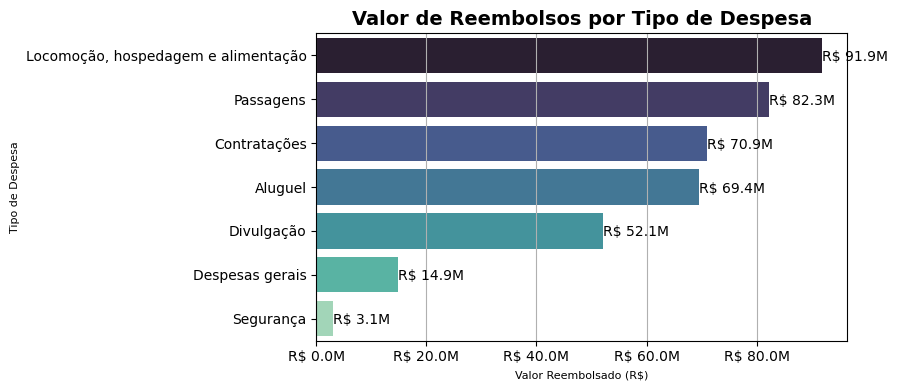

In [22]:
# Agrupando por tipo de despesa e somando os valores reembolsados
despesas_por_tipo = ceaps_total.groupby('TIPO_DESPESA')['VALOR_REEMBOLSADO'].sum().reset_index()

# Ordenando os dados pelo valor reembolsado
despesas_por_tipo = despesas_por_tipo.sort_values(by='VALOR_REEMBOLSADO', ascending=False)

# Criando o gráfico de barras
plt.figure(figsize=(9, 4))
ax = sns.barplot(data=despesas_por_tipo, x='VALOR_REEMBOLSADO', y='TIPO_DESPESA', hue='TIPO_DESPESA', palette='mako')

# Adicionando rótulos com os valores corretos e ajustando a posição
for p in ax.patches:
    ax.annotate(f'R$ {p.get_width()/1e6:.1f}M', 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center_baseline', fontsize=10, color='black')

# Formatando o eixo X para milhões
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'R$ {x/1e6:.1f}M'))

# Configurações adicionais do gráfico
plt.title('Valor de Reembolsos por Tipo de Despesa', fontsize=14, fontweight='bold')
plt.xlabel('Valor Reembolsado (R$)', fontsize=8)
plt.ylabel('Tipo de Despesa', fontsize=8)
plt.grid(True, axis='x')
plt.tight_layout()
plt.savefig('imgs/valor_por_tipo_despesa.png')
plt.show()

Valor de reembolso declarado dividido por fornecedor

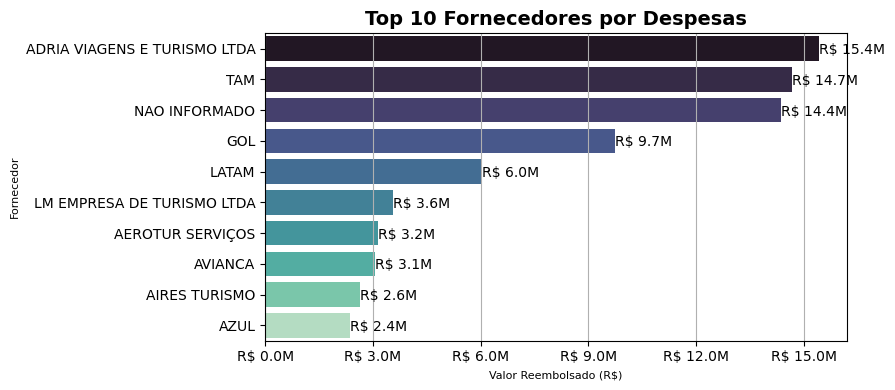

In [23]:
# Garantir que os nomes estão em maiúsculo
ceaps_total['NOME_FORNECEDOR'] = ceaps_total['NOME_FORNECEDOR'].str.upper()

# Escolher um nome de fornecedor para cada CNPJ (o mais frequente)
nome_fornecedor_map = (
    ceaps_total.groupby(['CPF_CNPJ_FORNECEDOR', 'NOME_FORNECEDOR'])
    .size()
    .reset_index(name='count')
    .sort_values(['CPF_CNPJ_FORNECEDOR', 'count'], ascending=[True, False])
    .drop_duplicates(subset='CPF_CNPJ_FORNECEDOR', keep='first')
    .set_index('CPF_CNPJ_FORNECEDOR')['NOME_FORNECEDOR']
)

# Agrupar os valores pelo CNPJ
despesas_por_cnpj = (
    ceaps_total.groupby('CPF_CNPJ_FORNECEDOR')['VALOR_REEMBOLSADO']
    .sum()
    .nlargest(10)  # Pegar os 10 maiores fornecedores
    .reset_index()
)

# Adicionar a coluna de nome correspondente
despesas_por_cnpj['NOME_FORNECEDOR'] = despesas_por_cnpj['CPF_CNPJ_FORNECEDOR'].map(nome_fornecedor_map)

# Criar o gráfico
plt.figure(figsize=(9, 4))
ax = sns.barplot(data=despesas_por_cnpj, x='VALOR_REEMBOLSADO', y='NOME_FORNECEDOR', hue='NOME_FORNECEDOR', palette='mako')

# Adicionar rótulos com os valores
for p in ax.patches:
    ax.annotate(f'R$ {p.get_width()/1e6:.1f}M', 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center_baseline', fontsize=10, color='black')

# Formatando o eixo X para milhões
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'R$ {x/1e6:.1f}M'))
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=6))

# Ajustes do gráfico
plt.title('Top 10 Fornecedores por Despesas', fontsize=14, fontweight='bold')
plt.xlabel('Valor Reembolsado (R$)', fontsize=8)
plt.ylabel('Fornecedor', fontsize=8)
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()
